/Users/endingalaporte/Documents/python/miniconda3/envs/jupyternotebookenv/lib/python3.8/site-packages/graph_tool/draw/cairo_draw.py:1494: RuntimeWarning: Error importing Gtk module: No module named 'gi'; GTK+ drawing will not work.
  warnings.warn(msg, RuntimeWarning)


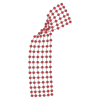

In [1]:
import graph_tool as gt
import graph_tool.draw as gtd
import graph_tool.generation as gtg
import numpy as np
import pandas as pd

#create lattice and export edgelist
g1 = gtg.lattice([6,20])
gtd.graph_draw(g1, output_size = (100,100))
edgelist = []
for edge in g1.edges():
    edgelist.append([int(edge.source()), int(edge.target())])
edgelist = np.array(edgelist)
df = pd.DataFrame(edgelist, columns = ['id1', 'id2'])
df.to_csv("/Users/endingalaporte/Desktop/lattice_edgelist.csv", index=False)



In [10]:
#import GDV as X
counts = pd.read_csv("/Users/endingalaporte/Desktop/planning/W21_2106-2806_CLUSTERING/OrbitalFeatures-master/output/lattice_orbital_features.csv")
counts = counts.drop(columns = ['id'])
X = counts.to_numpy() #X gives variety of distance, not good, simplify perwise distance

#import degree as X
X = g1.degree_property_map(deg = 'total').fa
X.shape


(120,)

In [11]:
def vertex_id(i : int, G : gt.Graph):
    """given edge id and a graph, returns the two edge's vertex ids"""
    s = int(tuple(G.edges())[i].source())
    t = int(tuple(G.edges())[i].target())
    return [s,t]

def distance(a, b, X):
    """given vertex id a and b, and the vertex property map, returns the distance between their weight"""
    #d = np.linalg.norm(X[a]- X[b], ord=1)
    d = abs(X[a] - X[b])
    return d

v_ids = np.arange(len(tuple(g1.vertices())))
distances = []
for i in v_ids:
    distances.append(distance(vertex_id(i, g1)[0], vertex_id(i, g1)[1], X))
distances = np.array(distances)
distances.shape


(120,)

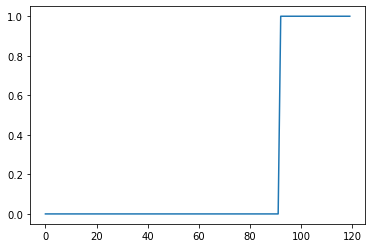

In [12]:
import matplotlib.pyplot as plt

plt.plot(sorted(distances))

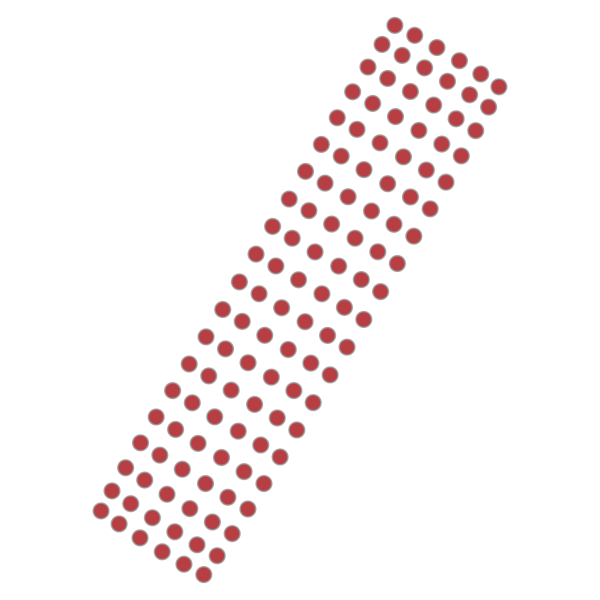

<VertexPropertyMap object with value type 'vector<double>', for Graph 0x107c898b0, at 0x166a8de20>

In [13]:
moitier = int(len(distances)/2)
autre = len(distances) - moitier

a = np.concatenate((np.array([0 for i in range(moitier)]), np.array([1 for i in range(autre)])))
gtd.graph_draw(g1, edge_color = a)

In [109]:
len(tuple(g1.edges()))

214